# Biological Signals Analysis - Week 4 Exercise

### Created by Guy Singer | Jan. 31, 2024

### Table of Contents:
- Images as Arrays
- Convolutions in Mathematics vs Image Processing
- Convolving Images With a Filter

## Images as Arrays <a id="ims-as-arrays" ></a>

A digital image, in its simplest form, is a matrix of pixel values. Each pixel represents the smallest unit of an image, holding a value that corresponds to its intensity or color. In grayscale images, each pixel is usually represented by a single value, indicating various shades of gray. Color images typically use a combination of red, green, and blue (RGB) values for each pixel.

Many Python libraries, such as `skimage` (Scikit-Image), provide an easy way to handle and process these images. Let's take a microscopy image as an example:

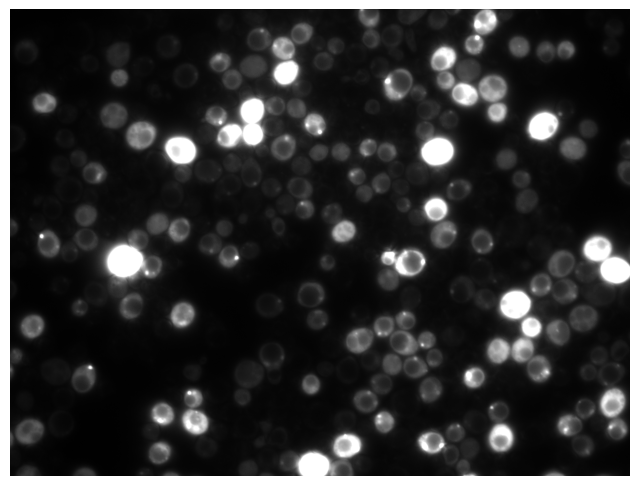

Array Representation of the Image:
[[219 225 220 ... 256 258 272]
 [218 211 217 ... 270 268 278]
 [217 217 214 ... 263 268 262]
 ...
 [337 343 321 ... 266 287 285]
 [320 323 339 ... 268 295 281]
 [329 353 335 ... 276 281 291]]

Shape of the Image Array: (1024, 1360)


In [3]:
import skimage.io
import matplotlib.pyplot as plt

# Load the image
image_url = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'
image = skimage.io.imread(image_url)

# Visualizing the image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Displaying the array structure of the image
print("Array Representation of the Image:")
print(image)
print("\nShape of the Image Array:", image.shape)


We can see that the image we see as an image is simply an array of values. For grayscale images these values will be between 0 and 255. For RGB images, there will be three dimensions of the array, each containing pixel values between 0 and 255.
With this understanding of images, we can readily see that many of the operations we have already discussed in this course can be easily applied to images, with the goal of transforming them, filtering them, or augmenting them. Through such operations, we can extract useful information from our image data.

## Convolution in Mathematics vs Image Processing <a id="convolutions-on-images" ></a>

### Mathematical Convolution

As we discussed last week, in mathematics, convolution is an operation that combines two functions into a third function. It represents the amount of overlap of one function as it is shifted over another.

For two continuous functions $ f $ and $ g $, convolution is defined as:

$ (f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau $

In the discrete case, typically used in digital signal processing, the formula becomes:

$ (f * g)[n] = \sum_{m=-\infty}^{\infty} f[m]g[n - m] $

Mathematical convolution is commutative, associative, and distributive over addition. This means the order of the functions does not change the result, allowing for flexible application in various contexts.

### Convolution in Image Processing

In image processing, convolution is a critical technique used for applying filters to images, such as for blurring, sharpening, or edge detection.
Convolution in image processing involves sliding a kernel (or filter) over the image, and performing pixel-wise multiplication and summing the results. Unlike mathematical convolution, the kernel is typically not reversed.

The adapted convolution formula for image processing is:

$ C(i, j) = \sum_{u=-k}^{k} \sum_{v=-k}^{k} I(i+u, j+v) \cdot K(u, v) $

Here, $ I $ represents the image, $ K $ is the kernel, and $ C $ is the convolved image.

### Key Differences

- **Kernel Flipping**: Unlike mathematical convolution, the kernel in image processing is not flipped before application.
- **Boundary Handling**: Image processing convolution must address boundary conditions, often through strategies like padding.
- **Purpose and Application**: While mathematical convolution is more abstract, convolution in image processing is applied for practical image manipulations, such as filtering and feature extraction.

## Convolving Images With a Filter <a id="convolved-filters" ></a>

### Gaussian Filter
A Gaussian filter is a widely used filter in image processing, known for its properties in reducing image noise and smoothing details.
The Gaussian filter is based on the Gaussian (normal) distribution. In a 2D Gaussian filter, the kernel values are calculated using the Gaussian function:

$ G(x, y) = \frac{1}{2 \pi \sigma^2} e^{- \frac{x^2 + y^2}{2 \sigma^2}} $

where `x` and `y` are distances from the origin in the horizontal and vertical axes, and `σ` is the standard deviation of the Gaussian distribution. The values of the Gaussian filter add up to 1, ensuring that the overall brightness of the image remains constant after filtering.

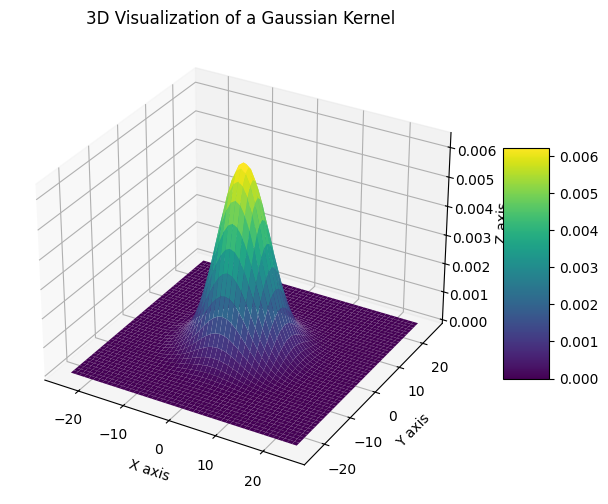

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a 2D Gaussian kernel
def gaussian_kernel(size, sigma=1.0):
    """Generates a 2D Gaussian kernel."""
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
    return g / g.sum()

# Creating a Gaussian kernel
size = 50  # Size of the kernel
sigma = 5  # Standard deviation of the Gaussian
kernel = gaussian_kernel(size, sigma)

# Plotting the Gaussian kernel
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create grid and compute kernel
X, Y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
Z = gaussian_kernel(size, sigma)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('3D Visualization of a Gaussian Kernel')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()